# 시계열 데이터
## 12-1 datetime 오브젝트
datetime 라이브러리는 날짜와 시간을 처리하는 등의 다양한 기능을 제공하는 파이썬 라이브러리이다. datetime 라이브러리에는 날짜를 처리하는 date 오브젝트, 시간을 처리하는 time 오브젝트, 날짜와 시간을 모두 처리하는 datetime 오브젝트가 포함되어 있다. 앞으로 3개의 오브젝트를 명확히 구분하기 위해 영문을 그대로 살려 date, time, datetime 오브젝트라고 부르겠다.

**datetime 오브젝트 사용하기**

1. datetime 오브젝트를 사용하기 위해 datetime 라이브러리를 불러온다.

In [170]:
from datetime import datetime

2. now, today 메서드를 사용하면 다음과 같이 현재 시간을 출력할 수 있다.

In [171]:
now1 = datetime.now()
print(now1)

2025-09-20 11:19:36.792069


In [172]:
now2 = datetime.today()
print(now2)

2025-09-20 11:19:37.762356


3. 다음은 datetime 오브젝트를 생성할 때 시간을 직접 입력하여 인자로 전달할 것이다. 각 변수를 출력하여 확인해 보면 입력한 시간을 바탕으로 datetime 오브젝트가 생성된 것을 알 수 있다.

In [173]:
t1 = datetime.now()
t2 = datetime(1970, 1, 1)
t3 = datetime(1970, 12, 12, 13, 24, 34)

print(t1)
print(t2)
print(t3)

2025-09-20 11:19:39.196098
1970-01-01 00:00:00
1970-12-12 13:24:34


4. datetime 오브젝트를 사용하는 이유 중 하나는 시간 계산을 할 수 있다는 점이다. 다음은 두 datetime 오브젝트의 차이를 구한 것이다.

In [174]:
diff1 = t1 - t2

print(diff1)
print(type(diff1))

20351 days, 11:19:39.196098
<class 'datetime.timedelta'>


In [175]:
diff2 = t2 - t1

print(diff2)
print(type(diff2))

-20352 days, 12:40:20.803902
<class 'datetime.timedelta'>


### datetime 오브젝트로 변환하기 - to_datetime 메서드
경우에 따라서는 시계열 데이터를 문자열로 저장해야 할 때도 있다. 하지만 문자열은 시간 계산을 할 수 없기 때문에 datetime 오브젝트로 변환해 주어야 한다. 이버넹는 to_datetime 메서드를 사용하여 문자열을 datetime 오브젝트로 변환하는 방법에 대해서 알아보겠다.

**문자열을 datetime 오브젝트로 변환하기**

1. 먼저 ebola 데이터 집합을 불러온다.

In [176]:
import pandas as pd
import os

ebola = pd.read_csv('country_timeseries.csv')

2. ebola 데이터프레임을 보면 문자열로 저장된 Date 열이 있는 것을 알 수 있다.

In [177]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

3. to_datetime 메서드를 사용하면 Date 열의 자료형을 datetime 오브젝트로 변환할 수 있다. 다음과 같이 to_datetime 메서드를 사용하여 Date 열의 자료형을 datetime 오브젝트로 변환한 다음 ebola 데이터프레임에 새로운 열로 추가한다.

In [178]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

4. to_datetime 메서드를 좀 더 자세히 알아보면, 시간 형식 지정자(%d, %m, %y)와 기호(/, -)를 적절히 조합하여 format 인자에 전달하면 그 형식에 맞게 정리된 datetime 오브젝트를 얻을 수 있다.

In [179]:
test_df1 = pd.DataFrame({'order_day':['01/01/15', '02/01/15', '03/01/15']})

test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [180]:
test_df2 = pd.DataFrame({'order_day':['01-01-15', '02-01-15', '03-01-15']})
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')

print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


### 시간 형식 지정자
다음은 시간 형식 지정자를 정리한 표이다.

**시간 형식 지정자**
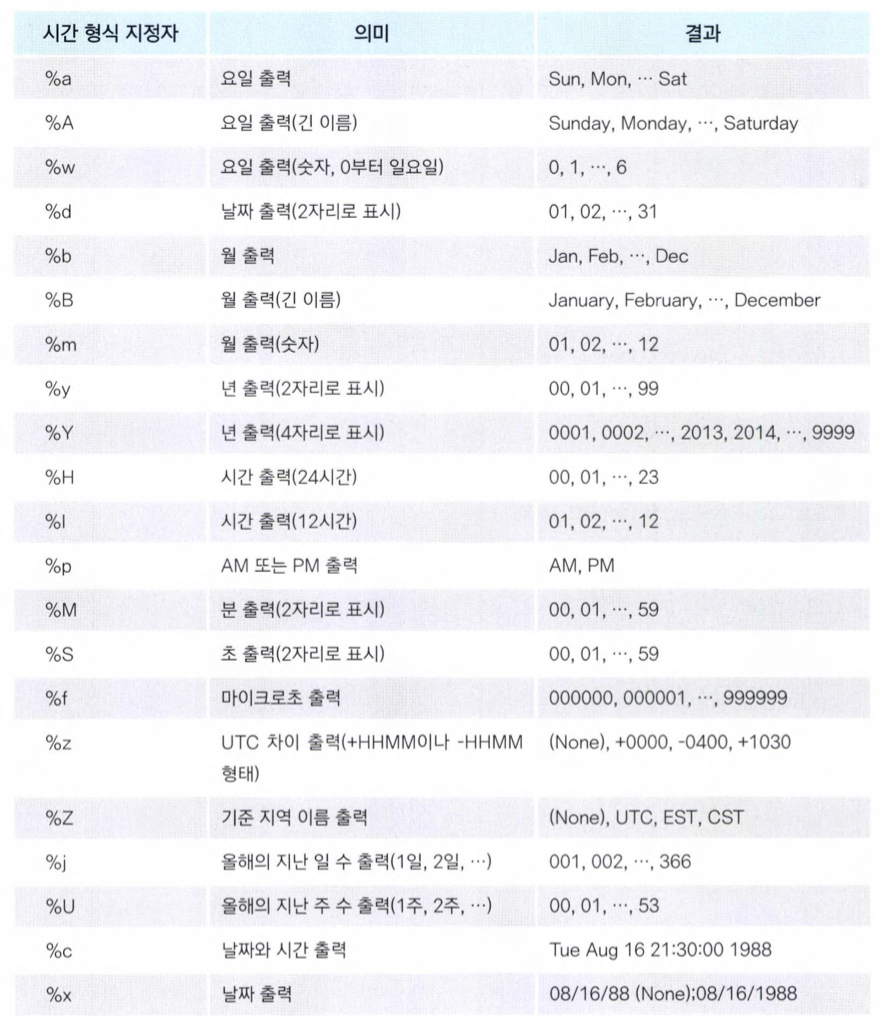

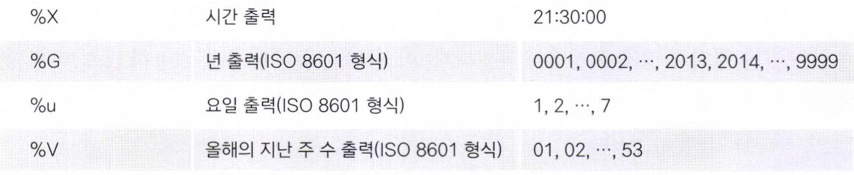

**시계얄 데이터를 구분해서 추출하고 싶어요**

now 메서드로 얻은 현재 시간의 시계열 데이터는 아주 정밀한 단위까지 시간을 표현한다. 하지만 원하는 시계열 데이터의 시간 요소가 연도, 월, 일뿐이라면 now 메서드로 얻은 시계열 데이터를 잘라내야 한다. 다음은 strftime 메서드와 시간 형식 지정자를 이용하여 시계열 데이터를 잘라낸 것이다.

In [181]:
now = datetime.now()
print(now)

2025-09-20 11:19:55.506604


In [182]:
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2025-09-20


In [183]:
nowTime = now.strftime('%H:%M:%S')
print(nowTime)

11:19:55


In [184]:
nowDateTime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDateTime)

2025-09-20 11:19:55


### datetime 오브젝트로 변환하기 - read_csv 메서드
앞에서는 to_datetiem 메서드를 사용하여 문자열로 저장되어 있는 Date 열을 datetime 오브젝트로 변환했다. 하지만 datetiem 오브젝트로 변환하려는 열을 지정하여 데이터 집합을 불러오는 것이 더 간단하다. 다음 실습을 통해 알아보겠다.

**datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기**

1. 다음은 read_csv 메서드의 parse_dates 인자에 datetime 오브젝트로 변환하고자 하는 열의 이름을 전달하여 데이터 집합을 불러온 것이다. 결과를 보면 Date 열이 문자열이 아니라 datetiem 오브젝트라는 것을 확인할 수 있다.

In [185]:
ebola1 = pd.read_csv('country_timeseries.csv', parse_dates = ['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

### datetime 오브젝트에서 날짜 정보 추출하기

datetime 오브젝트에는 년, 월, 일과 같은 날짜 정보를 따로 저장하고 있는 속성이 이미 준비되어 있다. 다음 실습을 통해 datetime 오브젝트에서 날짜 정보를 하나씩 추출해 보겠다.

**datetime 오브젝트에서 날짜 정보 추출하기**

1. 다음은 문자열로 저장된 날짜를 시리즈에 담아 datetime 오브젝트로 변환한 것이다.

In [186]:
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


2. datetime 오브젝트(d1)의 year, month, day 속성을 이용하면 년, 월, 일 정보를 바로 추출할 수 있다.

In [187]:
print(d1[0].year)

2018


In [188]:
print(d1[0].month)

5


In [189]:
print(d1[0].day)

16


### dt 접근자 사용하기

문자열을 처리하려면 str 접근자를 사용한 다음 문자열 속성이나 메서드를 사용해야 했다. datetiem 오브젝트도 마찬가지로 dt 접근자를 사용하면 datetime 속성이나 메서드를 사용하여 시계열 데이터를 처리할 수 있다.

**dt 접근자로 시계열 데이터 정리하기**

1. 먼저 ebola 데이터 집합을 불러온 다음 Date 열을 datetime 오브젝트로 변환하여 새로운 열(date_dt)로 추가한다.

In [190]:
ebola = pd.read_csv('country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

2. 다음은 dt 접근자를 사용하지 않고 인덱스가 3인 데이터의 년, 월, 일 데이터를 추출한 것이다.

In [191]:
print(ebola[['Date', 'date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [192]:
print(ebola['date_dt'][3].year)

2015


In [193]:
print(ebola['date_dt'][3].month)

1


In [194]:
print(ebola['date_dt'][3].day)

2


3. 과정 2와 같은 방법은 date_dt 열의 특정 데이터를 인덱스로 접근해야 하기 때문에 불편하다. 다음은 dt 접근자로 date_dt 열에 한 번에 접근한 다음 year 속성을 이용하여 연도값을 추출한 것이다. 추출한 연도값은 ebola 데이터프레임의 새로운 열(year)로 추가했다.

In [195]:
ebola['year'] = ebola['date_dt'].dt.year

print(ebola[['Date', 'date_dt', 'year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


4. 다음은 과정 3을 응용하여 월, 일 데이터를 한 번에 추출해서 새로운 열(month, day)로 추가한 것이다.

In [196]:
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)

print(ebola[['Date', 'date_dt', 'year', 'month', 'day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


5. 오른쪽은 ebola 데이터프레임에 새로 추가한 date_dt, year, month, day 열의 자료형을 출력한 것이다. date_dt 열은 datetime 오브젝트이고 나머지는 정수형이라는 것을 알 수 있다.

In [197]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

## 12-2 사례별 시계열 데이터 계산하기
**에볼라 최초 발병일 계산하기**

1. ebola 데이터프레임의 마지막 행과 열을 5개씩만 살펴보겠다. ebola 데이터프레임은 데이터가 시간 역순으로 정렬되어 있다. 즉, 시간 순으로 데이터를 살펴보려면 데이터프레임의 마지막부터 살펴봐야 한다.

In [198]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


2. 121행에서 볼 수 있듯이 에볼라가 발생하기 시작한 날은 2014년 03월 22일이다. 다음은 min 메서드를 사용하여 에볼라의 최초 발병일을 찾은 것이다.

In [199]:
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


3. 에볼라의 최초 발병일을 알아냈으니 Date 열에서 에볼라의 최초 발병일을 빼면 에볼라의 진행 정도를 알 수 있다.

In [200]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()

print(ebola[['Date', 'Day', 'outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


**파산한 은행의 개수 계산하기**

이번에는 파산한 은행 데이터를 불러와 분기별로 파산한 은행이 얼마나 되는지 계산해 보겠다. 그리고 이번에는 그래프로도 시각화해 보겠다.

1. 다음은 파산한 은행 데이터 집합을 불러온 것이다. banks 데이터프레임의 앞부분을 살펴보면 Closing Date, Updated Date 열의 데이터 자료형이 시계열 데이터라는 것을 알 수 있다.

In [201]:
banks = pd.read_csv('banklist.csv')
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  


2. Closing Date, Updated Date 열의 데이터 자료형은 문자열이다. 다음은 read_csv 메서드의 parse_dates 속성을 이용하여 문자열로 저장된 두 열을 datetiem 오브젝트로 변환하여 불러온 것이다.

In [202]:
banks_no_dates = pd.read_csv('banklist.csv')
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None


In [203]:
banks = pd.read_csv('banklist.csv', parse_dates = [5,6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


/tmp/ipython-input-372334253.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv('banklist.csv', parse_dates = [5,6])
/tmp/ipython-input-372334253.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv('banklist.csv', parse_dates = [5,6])


3. dt 접근자와 quarter 속성을 이용하면 은행이 파산한 분기를 알 수 있다. 다음은 dt 접근자와 year, quarter 속성을 이용하여 은행이 파산한 연도, 분기를 새로운 열로 추가한 것이다.

In [204]:
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)

print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

4. 이제 연도별로 파산한 은행이 얼마나 되는지 알아보겠다. groupby 메서드를 사용하면 연도별로 파산한 은행의 개수를 구할 수 있다.

In [205]:
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


5. 각 연도별, 분기별로 파산한 은행의 개수도 알아보겠다. 다음은 banks 데이터프레임을 연도별로 그룹화한 다음 다시 분기별로 그룹화하여 출력한 것이다.

In [206]:
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

6. 다음은 과정 5에서 얻은 값으로 그래프를 그린 것이다.

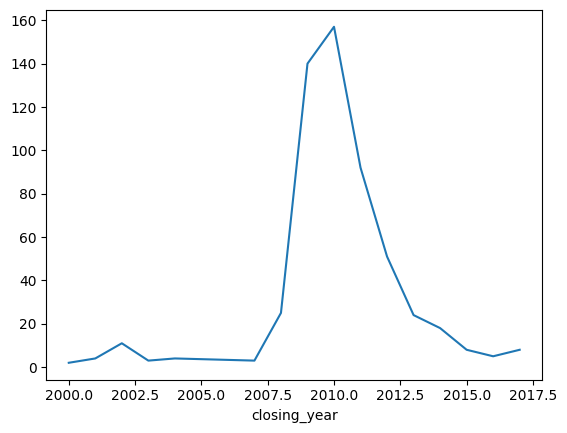

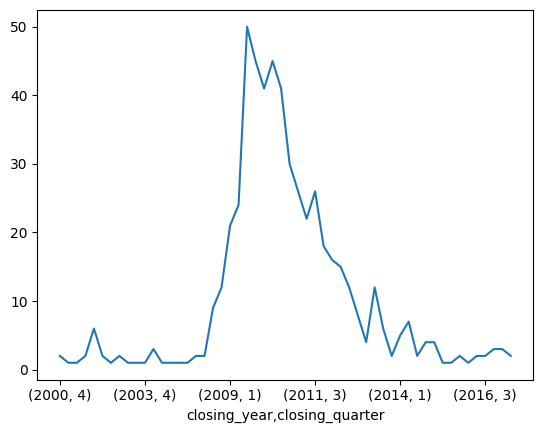

In [207]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

**테슬라 주식 데이터로 시간 계산하기**

이버넹는 pandas-datereader 라이브러리를 이용하여 주식 데이터를 불러오겠다. 이 라이브러리는 지금까지 설치한 적이 없는 라이브러리이다. 다음을 아나콘다 프롬프트에 입력하여 pandas-datereader 라이브러리를 설치한다.

In [208]:
pip install pandas-datareader

1. 다음은 get_data_quanal 메서드에 TSLA라는 문자열을 전달하여 테슬라의 주식 데이터를 내려받은 다음 to_csv 메서드를 사용하여 data 폴더 안에 'tesla_stock_quandl.csv'라는 이름으로 저장한 것이다.

In [209]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr

# tesla에는 데이터프레임이 저장됩니다.
# tesla = pdr.get_data_quandl('TSLA', api_key = '받은 key')

# tesla에 저장된 데이터프레임을 파일로 저장한다.
# tesla.to_csv('../data/tesla_stock_quandl.csv')
tesla = pd.read_csv('tesla_stock_quandl.csv')

2. tesla 데이터프레임의 Date 열은 문자열로 저장되어 있다. 즉, datetime 오브젝트로 자료형을 변환해야 시간 계산을 할 수 있다.

In [210]:
print(tesla.head())

         Date    Open    High     Low   Close      Volume  ExDividend  \
0  2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
1  2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2  2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
3  2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
4  2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

   SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
0         1.0   304.00   304.27  277.18    279.18  13696168.0  
1         1.0   307.34   307.59  291.36    304.18   8324639.0  
2         1.0   311.25   311.61  300.45    301.54   6600538.0  
3         1.0   313.89   318.82  308.18    309.10   4914307.0  
4         1.0   310.25   322.44  310.19    316.53   5927881.0  


3. Date 열을 Datetime 형으로 변환하려면 read_csv 메서드로 데이터 집합(tesla_stock_quandl.csv)을 불러올 때 parse_dates 인자에 Date 열을 전달하면 된다.

In [211]:
tesla = pd.read_csv('tesla_stock_quandl.csv', parse_dates=[0])
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1949 non-null   datetime64[ns]
 1   Open        1949 non-null   float64       
 2   High        1949 non-null   float64       
 3   Low         1949 non-null   float64       
 4   Close       1949 non-null   float64       
 5   Volume      1949 non-null   float64       
 6   ExDividend  1949 non-null   float64       
 7   SplitRatio  1949 non-null   float64       
 8   AdjOpen     1949 non-null   float64       
 9   AdjHigh     1949 non-null   float64       
 10  AdjLow      1949 non-null   float64       
 11  AdjClose    1949 non-null   float64       
 12  AdjVolume   1949 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 198.1 KB
None


4. Date 열의 자료형이 datetime 오브젝트로 변환되었다. 이제 dt 접근자를 사용할 수 있다. 다음은 불린 추출로 2010년 6월의 데이터만 추출한 것이다.

In [212]:
print(tesla.loc[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month == 6)])

           Date   Open     High    Low  Close      Volume  ExDividend  \
1947 2010-06-30  25.79  30.4192  23.30  23.83  17187100.0         0.0   
1948 2010-06-29  19.00  25.0000  17.54  23.89  18766300.0         0.0   

      SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
1947         1.0    25.79  30.4192   23.30     23.83  17187100.0  
1948         1.0    19.00  25.0000   17.54     23.89  18766300.0  


### datetime 오브젝트와 인덱스 - DatetimeIndex
지금까지의 실습은 대부분 데이터프레임의 행 번호를 인덱스로 사용했지만 datetime 오브젝트를 데이터프레임의 인덱스로 설정하면 원하는 시간의 데이터를 바로 추출할 수 있어 편리하다. 이번에는 datetime 오브젝트를 인덱스로 지정하는 방법에 대해 알아보겠다.

**datetiem 오브젝트를 인덱스로 설정해 데이터 추출하기**

1. 계속해서 테슬라 주식 데이터를 사용하여 실습을 진행하겠다. 다음은 Date 열을 tesla 데이터프레임의 인덱스로 지정한 것이다.

In [213]:
tesla.index = tesla['Date']
print(tesla.index)

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2010-07-13', '2010-07-12', '2010-07-09', '2010-07-08',
               '2010-07-07', '2010-07-06', '2010-07-02', '2010-07-01',
               '2010-06-30', '2010-06-29'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)


2. datetime 오브젝트를 인덱스로 지정하면 다음과 같은 방법으로 원하는 시간의 데이터를 바로 추출할 수 있다. 다음은 2015년의 데이터를 추출한 것이다.

In [214]:
print(tesla.loc['2015'].iloc[:5, :5])

                 Date    Open     High       Low   Close
Date                                                    
2015-12-31 2015-12-31  238.51  243.450  238.3700  240.01
2015-12-30 2015-12-30  236.60  243.634  235.6707  238.09
2015-12-29 2015-12-29  230.06  237.720  229.5470  237.19
2015-12-28 2015-12-28  231.49  231.980  225.5400  228.95
2015-12-24 2015-12-24  230.56  231.880  228.2800  230.57


3. 다음은 2010년 6월의 데이터를 추출한 것이다.

In [215]:
print(tesla.loc['2010-06'].iloc[:, :5])

                 Date   Open     High    Low  Close
Date                                               
2010-06-30 2010-06-30  25.79  30.4192  23.30  23.83
2010-06-29 2010-06-29  19.00  25.0000  17.54  23.89


### 시간 간격과 인덱스 - TimedeltaIndex
예를 들어 주식 데이터에서 최초 5일간 수집된 데이터만 살펴보고 싶다면 어떻게 해야 할까? 이런 경우에는 시간 간격을 인덱스로 지정하여 데이터를 추출하면 된다. 이번에는 datetime 오브젝트를 인덱스로 지정하는 것이 아니라 시간 간격을 인덱스로 지정하면 진행하겠다.

**시간 간격을 인덱스로 지정해 데이터 추출하기**

1. Date 열에서 Date 열의 최솟값(2010-06-29)을 빼면 데이터를 수집한 이후에 시간이 얼마나 흘렀는지 알 수 있다. 다음은 Date 열에서 Date 열의 최솟값을 뺸 다음 ref_date 열로 추가한 것이다.

In [216]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
print(tesla.head())

                 Date    Open    High     Low   Close      Volume  ExDividend  \
Date                                                                            
2018-03-27 2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
2018-03-26 2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2018-03-23 2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
2018-03-22 2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
2018-03-21 2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

            SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  \
Date                                                                     
2018-03-27         1.0   304.00   304.27  277.18    279.18  13696168.0   
2018-03-26         1.0   307.34   307.59  291.36    304.18   8324639.0   
2018-03-23         1.0   311.25   311.61  300.45    301.54   6600538.0   
2018-03-22         1.0   313.89   318.82  308.18    309.10   4

2. 다음과 같이 ref_date 열을 인덱스로 지정했다. 이제 시간 간격(ref_date)을 이용하여 데이터를 추출할 수 있다.

In [217]:
tesla.index = tesla['ref_date']
print(tesla.iloc[:5, :5])

                Date    Open    High     Low   Close
ref_date                                            
2828 days 2018-03-27  304.00  304.27  277.18  279.18
2827 days 2018-03-26  307.34  307.59  291.36  304.18
2824 days 2018-03-23  311.25  311.61  300.45  301.54
2823 days 2018-03-22  313.89  318.82  308.18  309.10
2822 days 2018-03-21  310.25  322.44  310.19  316.53


3. 다음은 데이터를 수집한 이후 최초 5일을 데이터를 추출한 것이다.

In [218]:
print(tesla['5 days':].iloc[:5, :5])

               Date   Open     High    Low  Close
ref_date                                         
3 days   2010-07-02  23.00  23.1000  18.71  19.20
2 days   2010-07-01  25.00  25.9200  20.27  21.96
1 days   2010-06-30  25.79  30.4192  23.30  23.83
0 days   2010-06-29  19.00  25.0000  17.54  23.89


### 시간 범위와 인덱스

앞에서 사용한 주식 데이터는 특정 일에 누락된 데이터가 없었다. 하지만 가끔은 데이터를 수집하지 못한 날도 있을 수 있다. 만약 특정 일에 누락된 데이터도 포함시켜 데이터를 살펴보려면 어떻게 해야 할까? 이런 경우에는 임의로 시간 범위를 생성하여 인덱스로 지정해야 한다.

**시간 범위 생성해 인덱스로 지정하기**

1. 테슬라 주식 데이터는 특정 일에 누락도니 데이터가 없다. 그래서 이번에는 에볼라 데이터 집합을 사용하겠다. 가장 앞쪽의 데이터를 살펴보면 2015년 01월 01일의 데이터가 누락된 것을 알 수 있다.

In [219]:
ebola = pd.read_csv('country_timeseries.csv', parse_dates=[0])
print(ebola.iloc[:5, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


2. 뒤쪽의 데이터도 마찬가지이다. 2014년 03월 23일의 데이터가 누락되었다.

In [220]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


3. 다음은 date_range 메서드를 사용하여 2014년 12월 31일부터 2015년 01월 05일 사이의 시간 인덱스(DatetimeIndex)를 생성한 것이다.

In [221]:
head_range = pd.date_range(start = '2014-12-31', end = '2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


4. 다음은 원본 데이터를 손상시키는 것을 방지하기 위해 ebola 데이터프레임의 앞쪽 5개의 데이터를 추출하여 새로운 데이터프레임을 만든 것이다. 이때 Date 열을 인덱스로 먼저 지정하지 않으면 오류가 발생한다. 반드시 Date 열을 인덱스로 지정한 다음 과정 3에서 생성한 시간 범위를 인덱스로 지정해야 한다.

In [222]:
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5.reindex(head_range)
print(ebola_5.iloc[:5, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


**시간 범위의 주기 설정하기**

시간 범위를 인덱스로 지정하면 DatetimeIndex 자료형이 만들어진다. 그리고 DatetimeIndex에는 freq 속성이 포함되어 있다.freq 속성값을 지정하면 시간 간격을 조절하여 DatetimeIndex를 만들 수 있다. 아래에 freq 속성값으로 사용할 수 있는 시간 주기를 표로 정리했다.

**freq 속성값으로 사용할 수 있는 시간 주기**

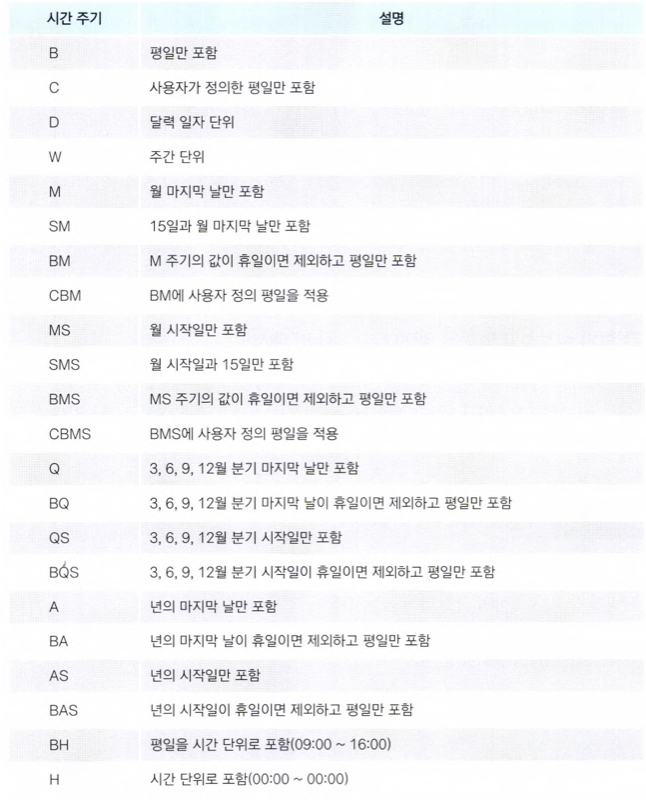

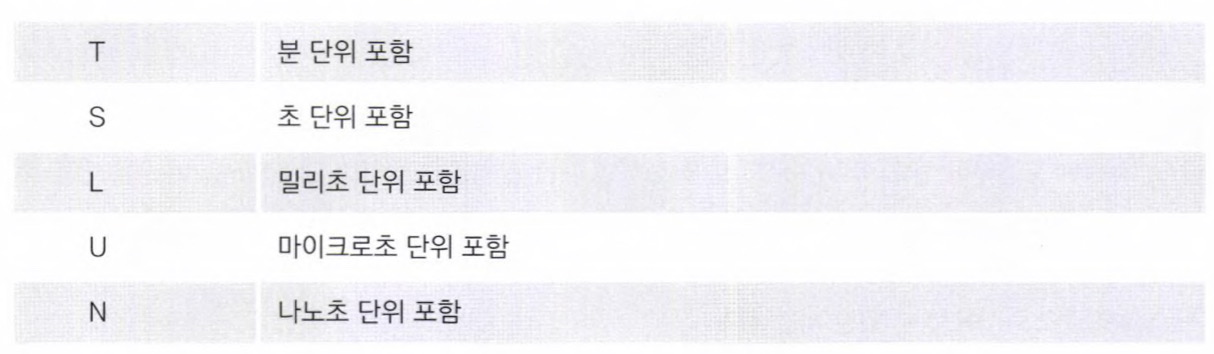

다음은 date_range 메서드의 freq 인잣값을 B로 설정하여 평일만 포함시킨 DatetimeIndex를 만든 것이다.

In [223]:
print(pd.date_range('2017-01-01', '2017-01-07', freq='B'))

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')


### 시간 범위 수정하고 데이터 밀어내기 - shift 메서드
만약 나라별로 에볼라의 확산 속도를 비교하려면 발생하기 시작한 날짜를 옮기는 것이 좋다. 왜 그럴까? 일단 ebola 데이터프레임으로 그래프를 그려보고 에볼라의 확산 속도를 비교하는 데 어떤 문제가 있는지 그리고 해결 방법은 무엇인지 알아보겠다.

**에볼라의 확산 속도 비교하기**

1. 다음은 ebola 데이터프레임의 Date 열을 인덱스로 지정한 다음 x축을 Date 열로, y축을 사망자 수로 지정하여 그린 그래프이다.

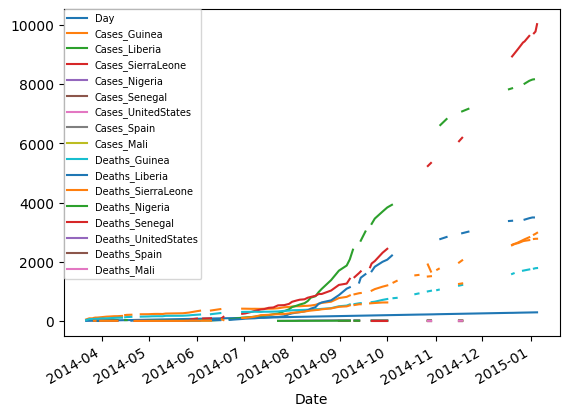

In [224]:
import matplotlib.pyplot as plt

ebola.index = ebola['Date']

fig, ax = plt.subplots()
ax = ebola.iloc[0:, 1:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

2. 그런데 과정 1의 그래프는 각 나라의 에볼라 발병일이 달라 그래프가 그려지기 시작한 지점도 다르다. 달리기 속도를 비교하려면 같은 출발선에서 출발하여 시간을 측정해야한다. 에볼라의 확산 속도도 같은 방법으로 측정해야 한다. 즉, 각 나라의 발병일을 가장 처음 에볼라가 발생한 Guinea와 동일한 위치로 옮겨야 나라별 에볼라의 확산 속도를 제대로 비교할 수 있다.

In [225]:
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


3. 그래프를 그리기 위한 데이터프레임 준비하기

다음은 Date 열의 자료형을 datetime 오브젝트로 변환하여 ebola 데이터프레임을 다시 생성한 것이다. 그런데 중간에 아예 날짜가 없는 데이터(2015년 01월 01일)도 있다. 이 데이터도 포함시켜야 확산 속도를 제대로 비교할 수 있다.

In [226]:
ebola = pd.read_csv('country_timeseries.csv', parse_dates=['Date'])

print(ebola.head().iloc[:, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [227]:
print(ebola.tail().iloc[:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


4. 다음은 Date 열을 인덱스로 지정한 다음 ebola 데이터프레임의 Date 열의 최댓값과 최솟값으로 시간 범위를 생성하여 new_idx에 저장한 것이다. 이렇게 하면 날짜가 아예 없었던 데이터의 인덱스를 생성할 수 있다.

In [228]:
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())

5. 그런데 new_idx를 살펴보면 ebola 데이터 집합에 있는 시간 순서와 반대로 생성되어 있다. 다음은 시간 순서를 맞추기 위해 reversed 메서드를 사용하여 인덱스를 반대로 뒤집은 것이다.

In [229]:
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [230]:
new_idx = reversed(new_idx)

6. 다음은 reindex 메서드를 사용하여 새로 생성한 인덱스(new_idx)르 새로운 인덱스로 지정한 것이다. 그러면 2015년 01월 01일 데이터와 같은 ebola 데이터프레임에 아예 없었던 날짜가 추가된다. 이제 그래프를 그리기 위한 데이터프레임이 준비되었다.

In [231]:
ebola = ebola.reindex(new_idx)

print(ebola.head().iloc[:, :5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN


In [232]:
print(ebola.tail().iloc[:, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 2014-03-22  0.0          49.0            NaN                NaN


7. 각 나라의 에볼라 발병일 옮기기

다음은 last_valid_index, first_valid_index 메서드를 사용하여 각 나라의 에볼라 발병일을 구한 것이다. 각각의 메서드는 유효한 값이 있는 첫 번째와 마지막 인덱스를 반환한다.

In [233]:
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [234]:
first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]


8. 각 나라의 에볼라 발병일을 동일한 출발선으로 옮기려면 에볼라가 가장 처음 발병한 날(earliest_date)에서 각 나라의 에볼라 발병일을 뺀 만큼(shift_values)만 옮기면 된다.

In [235]:
earliest_date = ebola.index.min()
print(earliest_date)

2014-03-22 00:00:00


In [236]:
shift_values = last_valid - earliest_date
print(shift_values)

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


9. 이제 각 나라의 에볼라 발병일을 옮기면 된다. 다음은 shift 메서드를 사용하여 모든 열의 값의 shift_values 값만큼 옮긴 것이다. shift 메서드는 인잣값만큼 데이터를 밀어내는 메서드이다.

In [237]:
ebola_dict = {}
for idx, col in enumerate(ebola):
  d = shift_values[idx].days
  shifted = ebola[col].shift(d)
  ebola_dict[col] = shifted

/tmp/ipython-input-1533768380.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = shift_values[idx].days


10. ebola_dict에는 시간을 다시 설정한 데이터가 딕셔너리 형태로 저장되어 있다. 다음은 DateFrame 메서드를 사용하여 ebola_dict의 값을 데이터프레임으로 변환한 것이다.

In [238]:
ebola_shift = pd.DataFrame(ebola_dict)

11. 이제 에볼라의 최초 발병일(2014-03-22)을 기준으로 모든 열의 데이터가 옮겨졌다.

In [239]:
print(ebola_shift.tail())

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2014-03-26 2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24 2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23        NaT  NaN           NaN            3.0                2.0   
2014-03-22 2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN        

12. 마지막으로 인덱스를 Day 열로 지정하고 그래프에 필요 없는 Date, Day 열은 삭제하면 그래프를 그리기 위한 데이터프레임이 완성된다.

In [240]:
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date', 'Day'], axis = 1)

print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
4.0          86.0            8.0                2.0            1.0   
3.0          86.0            NaN                NaN            NaN   
2.0          86.0            7.0                NaN            NaN   
NaN           NaN            3.0                2.0            NaN   
0.0          49.0            8.0                6.0            0.0   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
4.0            NaN                 1.0          1.0         NaN   
3.0            NaN                 NaN          NaN         NaN   
2.0            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
0.0            1.0                 1.0          1.0         1.0   

     Deaths_Guinea  Deaths_Liberia  Dea

13. 다음은 지금까지 만든 데이터프레임으로 다시 그린 그래프이다.

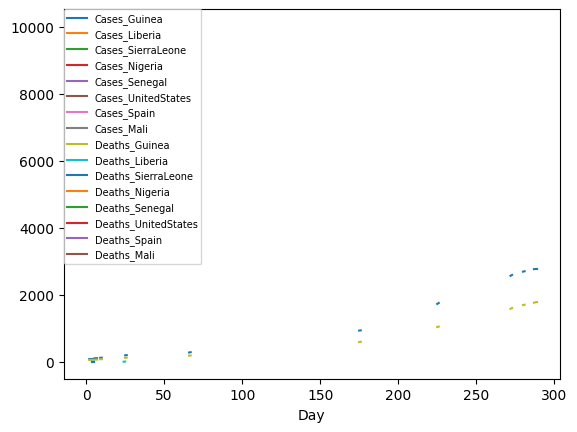

In [242]:
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:, :].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

### 마무리하며
판다스 라이브러리는 시간을 다룰 수 있는 다양한 기능을 제공한다. 이 장에서는 시계열 데이터와 깊은 연관성이 있는 에볼라 데이터 및 주식 데이터를 주로 다루었다. 우리 주변의 상당수의 데이터는 시간과 깊은 연관성이 있는 경우가 많다. 시계열 데이터를 능숙하게 다루는 것은 데이터 분석가의 기본 소양이므로 이 장의 내용을 반드시 익혀두기 바란다.